In [1]:
import os
import sys
from pathlib import Path
ROOT = Path().resolve().parent
from time import time
import numpy as np
import scipy
import matplotlib.pyplot as plt
import soundfile as sf
from autoeq.frequency_response import FrequencyResponse
from autoeq.peq import LowShelf, Peaking, HighShelf

In [2]:
fr = FrequencyResponse.read_from_csv(ROOT.joinpath('compensation/harman_in-ear_2019v2.csv'))

low_shelf = LowShelf(fr.frequency, 44100, fc=105, q=0.7, gain=9)
fr.raw -= low_shelf.fr
ix200 = np.argmin(np.abs(fr.frequency - 200))
ix300 = np.argmin(np.abs(fr.frequency - 300))
floor_ix = np.argmin(fr.raw[ix200:ix300]) + ix200
fr.raw[:floor_ix] = fr.raw[floor_ix]

ear_degain = Peaking(fr.frequency, 44100, fc=3766, q=0.63, gain=-2)
fr.raw += ear_degain.fr

fr.center()
fr.name = 'AutoEq In-ear Target'

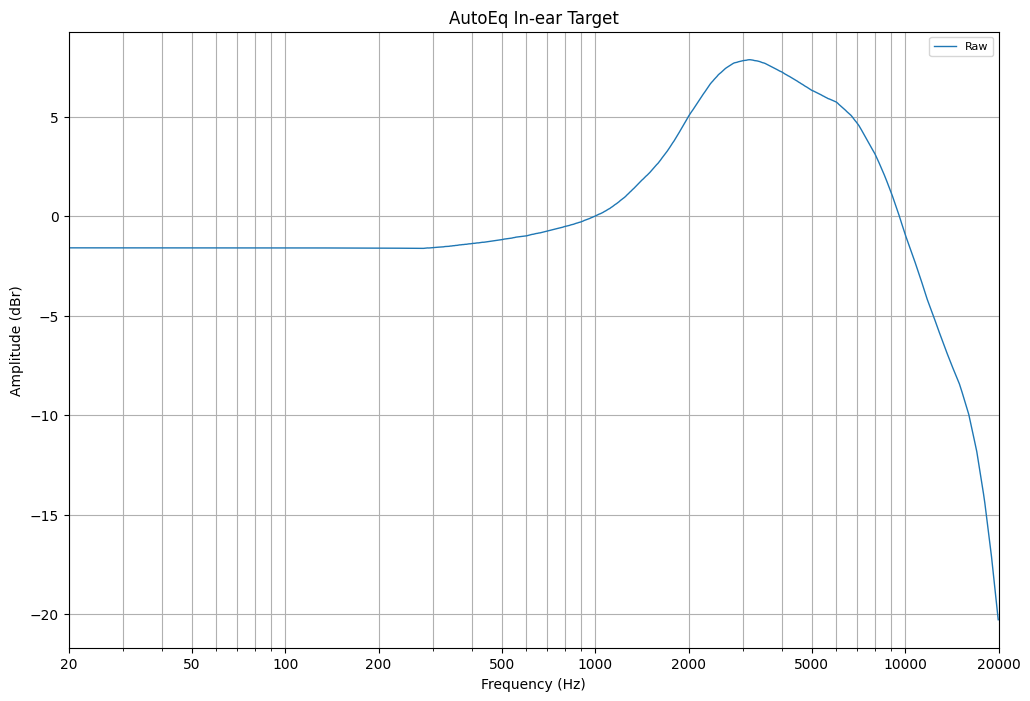

In [3]:
fr.plot_graph(color='C0')
plt.show()

In [48]:
for i in range(len(fr.frequency) - 90, len(fr.frequency)):
    print(i, fr.frequency[i], fr.raw[i], fr.raw[i] - fr.raw[i-1])

605 8231.16 2.6827957984902455 -0.14300532187263482
606 8313.47 2.529589526374719 -0.1532062721155265
607 8396.61 2.3761807059967115 -0.15340882037800752
608 8480.57 2.2325640731265937 -0.14361663287011783
609 8565.38 2.0587424397512413 -0.1738216333753524
610 8651.03 1.8947110728317442 -0.16403136691949705
611 8737.54 1.7204711495427545 -0.17423992328898974
612 8824.92 1.5460220761588581 -0.17444907338389637
613 8913.17 1.3713616925596455 -0.17466038359921265
614 9002.3 1.1964898223681049 -0.1748718701915406
615 9092.32 1.011406423014746 -0.18508339935335894
616 9183.25 0.8161131768404456 -0.19529324617430033
617 9275.08 0.6206070547896796 -0.195506122050766
618 9367.83 0.42489001363903867 -0.19571704115064092
619 9461.51 0.2289624814052404 -0.19592753223379827
620 9556.12 0.03282354186211045 -0.19613893954312994
621 9651.68 -0.18352465854830935 -0.2163482004104198
622 9748.2 -0.3900814029929548 -0.20655674444464545
623 9845.68 -0.5968472288485508 -0.206765825855596
624 9944.14 -0.803

In [49]:
for i in range(614, 695):
    fr.raw[i] = fr.raw[i-1] - 0.175

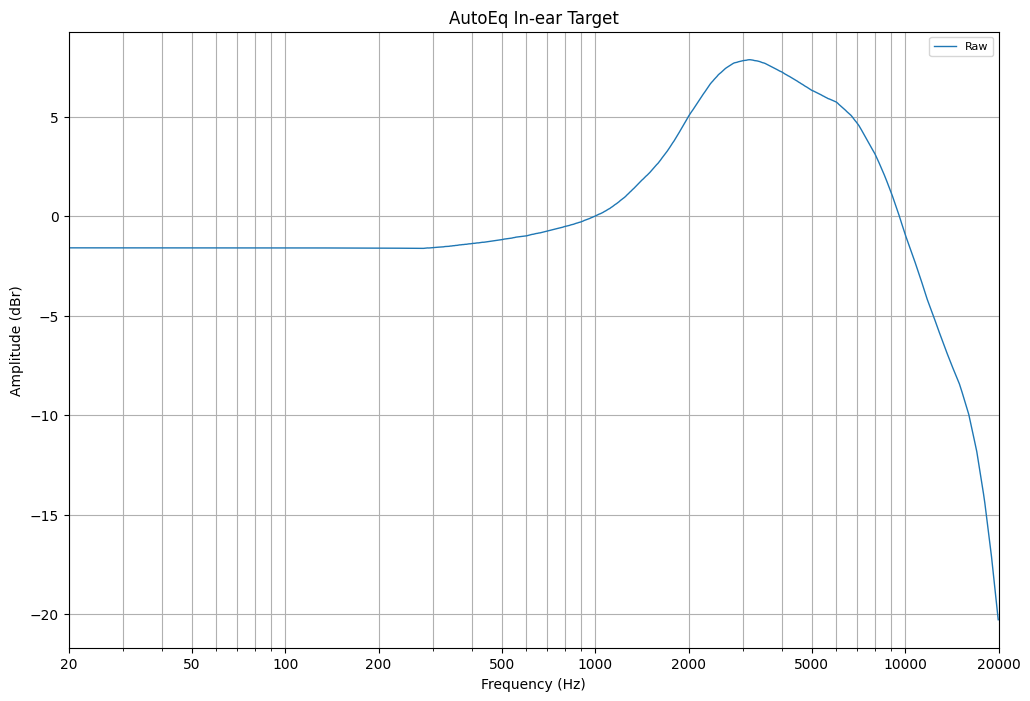

(<Figure size 1200x800 with 1 Axes>,
 <AxesSubplot:title={'center':'AutoEq In-ear Target'}, xlabel='Frequency (Hz)', ylabel='Amplitude (dBr)'>)

In [4]:
fr.plot_graph(color='C0', file_path=ROOT.joinpath('compensation/autoeq_in-ear.png'))
#fr.plot_graph(color='C0')

In [5]:
fr.write_to_csv(ROOT.joinpath('compensation/autoeq_in-ear.csv'))